# Getting started with Qiskit and Quantinuum on Azure Quantum

This notebook shows how to send a basic quantum circuit expressed using the [Qiskit library](https://github.com/QISKit/qiskit-terra) to a Quantinuum target via the Azure Quantum service.

First, install `azure-quantum` with the `qiskit` dependencies:

In [1]:
# To install the Azure Quantum client package with support for
# Qiskit, uncomment and run the line below:
#
# !pip install azure-quantum[qiskit]==0.19.2109.165653 --quiet
#
# We also recommend installing matplotlib, if you don't have it installed already:
# !pip install matplotlib --quiet

And import the required packages for this sample:

In [1]:
from qiskit import QuantumCircuit
from qiskit.visualization import plot_histogram
from qiskit.tools.monitor import job_monitor
from azure.quantum.qiskit import AzureQuantumProvider

## Connecting to the Azure Quantum service

To connect to the Azure Quantum service, find the resource ID and location of your Workspace from the Azure portal here: https://portal.azure.com. Navigate to your Azure Quantum workspace and copy the values from the header.

<img src="../azure-quantum-resource-id.png" alt="How to retrieve the resource ID and location from an Azure Quantum workspace">

In [2]:
# Enter your workspace details here
# Find your resource ID and location via portal.azure.com
provider = AzureQuantumProvider(
  resource_id="",
  location=""
)

Use `provider.backends` to see what targets are currently available. Running this method will trigger authentication to your Microsoft account, if you're not already logged in.

In [3]:
print([backend.name() for backend in provider.backends()])

['ionq.simulator', 'ionq.qpu', 'quantinuum.qpu.h1-1', 'quantinuum.sim.h1-1sc', 'quantinuum.sim.h1-1e']


### Run a simple circuit on the Quantinuum API validator

Note that this backend will always return 0 on measurement.

In [4]:
# Get Quantinuum's API validator backend:
apival_backend = provider.get_backend("quantinuum.sim.h1-1sc")

Let's create a simple Qiskit circuit to run.

This notebook assumes some familiarity with Qiskit. To read more about Qiskit, review the [Qiskit documentation](https://qiskit.org/documentation/intro_tutorial1.html).

In [5]:
# Create a Quantum Circuit acting on the q register
circuit = QuantumCircuit(3, 3)
circuit.name = "Qiskit Sample - 3-qubit GHZ circuit"
circuit.h(0)
circuit.cx(0, 1)
circuit.cx(1, 2)
circuit.measure([0,1,2], [0, 1, 2])

# Print out the circuit
circuit.draw()

┌───┐          ┌─┐      
q_0: ┤ H ├──■───────┤M├──────
     └───┘┌─┴─┐     └╥┘┌─┐   
q_1: ─────┤ X ├──■───╫─┤M├───
          └───┘┌─┴─┐ ║ └╥┘┌─┐
q_2: ──────────┤ X ├─╫──╫─┤M├
               └───┘ ║  ║ └╥┘
c: 3/════════════════╩══╩══╩═
                     0  1  2

Job id 3e7decf2-fc93-11eb-8301-00155df03c4e
Job Status: job has successfully run
Result(backend_name='quantinuum.sim.h1-1sc', backend_version='1', qobj_id='Qiskit Sample - 3-qubit GHZ circuit', job_id='3e7decf2-fc93-11eb-8301-00155df03c4e', success=True, results=[ExperimentResult(shots=1024, success=True, meas_level=2, data=ExperimentResultData(counts={'000': 1024}, probabilities={'000': 1.0}), header=QobjExperimentHeader(name='Qiskit Sample - 3-qubit GHZ circuit'))])
{'000': 1024, '001': 0, '010': 0, '011': 0, '100': 0, '101': 0, '110': 0, '111': 0}


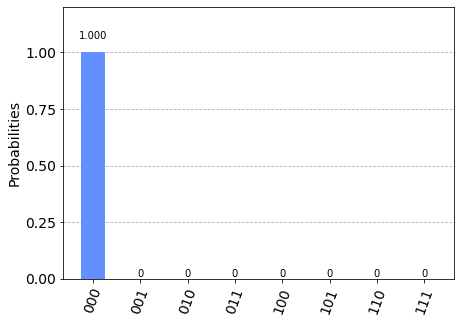

In [6]:
# Submit the circuit to run on Azure Quantum
job = apival_backend.run(circuit, count=1024)
job_id = job.id()
print("Job id", job_id)

# Monitor job progress and wait until complete:
job_monitor(job)

# Get the job results (this method also waits for the Job to complete):
result = job.result()
print(result)
# The histogram returned by the results can be sparse, so here we add any of the missing bitstring labels.
counts = {format(n, "03b"): 0 for n in range(8)}
counts.update(result.get_counts(circuit))
print(counts)
plot_histogram(counts)

### Run on QPU

#### Note: The time required to run a circuit on the QPU may vary depending on current queue times.

In [7]:
# Get Quantinuum's QPU backend:
qpu_backend = provider.get_backend("quantinuum.qpu.h1-1")

In [8]:
# Submit the circuit to run on Azure Quantum
job = qpu_backend.run(circuit, count=500)
job_id = job.id()
print("Job id", job_id)

# Monitor job progress and wait until complete:
job_monitor(job)

Job id ba839b3e-fc4e-11eb-9d2c-00155df03c4e

Job Status: job has successfully run


Result(backend_name='quantinuum.sim.h1-1sc', backend_version='1', qobj_id='Qiskit Sample - 3-qubit GHZ circuit', job_id='ba839b3e-fc4e-11eb-9d2c-00155df03c4e', success=True, results=[ExperimentResult(shots=1024, success=True, meas_level=2, data=ExperimentResultData(counts={'011': 16, '010': 5, '001': 1, '000': 500, '111': 471, '101': 6, '100': 17, '110': 8}, probabilities={'011': 0.015625, '010': 0.0048828125, '001': 0.0009765625, '000': 0.48828125, '111': 0.4599609375, '101': 0.005859375, '100': 0.0166015625, '110': 0.0078125}), header=QobjExperimentHeader(name='Qiskit Sample - 3-qubit GHZ circuit'))])
{'000': 500, '001': 1, '010': 5, '011': 16, '100': 17, '101': 6, '110': 8, '111': 471}


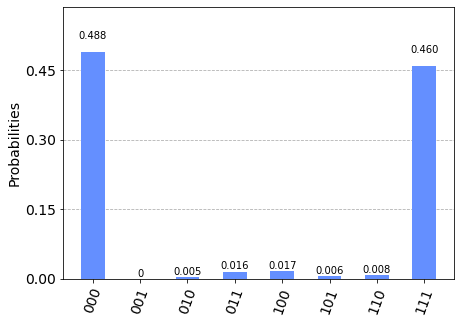

In [9]:
# Get the job results (this method also waits for the Job to complete):
result = job.result()
print(result)
counts = {format(n, "03b"): 0 for n in range(8)}
counts.update(result.get_counts(circuit))
print(counts)
plot_histogram(counts)

In [10]:
# Print package versions used in this notebook
import qiskit
print('\n'.join(f'{m.__name__}=={m.__version__}' for m in globals().values() if getattr(m, '__version__', None)))

qiskit==0.18.0
